In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


column based on Region
1. "Bejaia Regiion dataset
2. "sidi-Bel Abbes Region Dataset
add new column with region

In [3]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region']=1
df[['Region']] = df[['Region']].astype(int)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


### Data cleaning

In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [6]:
## remove the null value
df = df.dropna().reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [8]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [9]:
## remove the 122 row
df = df.drop(122).reset_index(drop=True)

In [10]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### fix spaces in columns names

In [12]:
df.columns= df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### change the required columns as interger data type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [14]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [16]:
## convert into float
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [18]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [19]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
94,3,9,2012,25,78,15,3.8,42.6,1.2,7.5,0.1,1.7,0.0,not fire,0
83,23,8,2012,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,fire,0
227,15,9,2012,32,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,0
78,18,8,2012,36,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,fire,0
135,14,6,2012,27,79,16,0.7,53.4,6.4,7.3,0.5,6.1,0.3,not fire,1
33,4,7,2012,33,78,17,0.0,80.1,4.6,18.5,2.7,5.7,1.7,not fire,0
38,9,7,2012,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,not fire,0
73,13,8,2012,35,63,15,0.0,87.0,19.0,85.1,5.9,24.4,10.2,fire,0


### Save the cleaned dataset

In [20]:
df.to_csv('Algerian_forest_cleaned_data.csv',index=False)

## Exploatory Data Analysis

In [130]:
df = pd.read_csv('Algerian_forest_cleaned_data.csv')

In [131]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [132]:
# drop some columns
df.drop(columns=['day','month','year'])

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [133]:
## Ecnoding of the categories in classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [134]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [135]:
## plot desnity plot for all features 
# plt.style.use('seaborn')
# df.hist(bins=50,figsize=(20,15));

In [136]:
## percentage for pie chart
p = df['Classes'].value_counts(normalize=True)*100



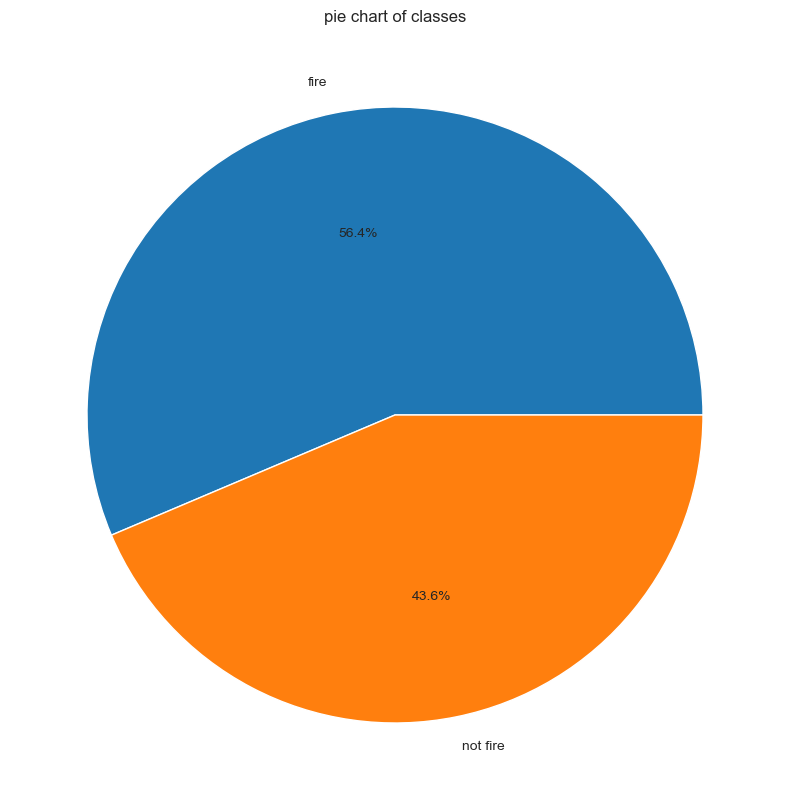

In [137]:
l = ['fire','not fire']
plt.figure(figsize=(10,10))
plt.pie(p,labels=l,autopct="%1.1f%%")
plt.title('pie chart of classes');

### Correlation

In [138]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

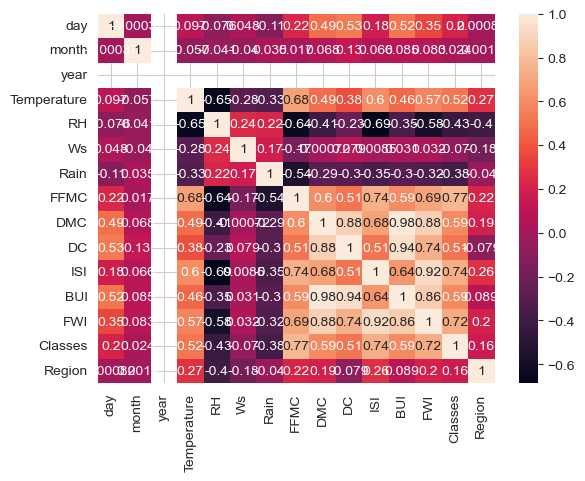

In [139]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='FWI'>

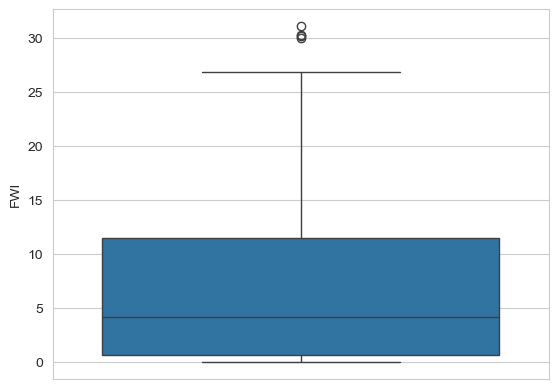

In [140]:
## Box plot
sns.boxplot(df['FWI'])

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

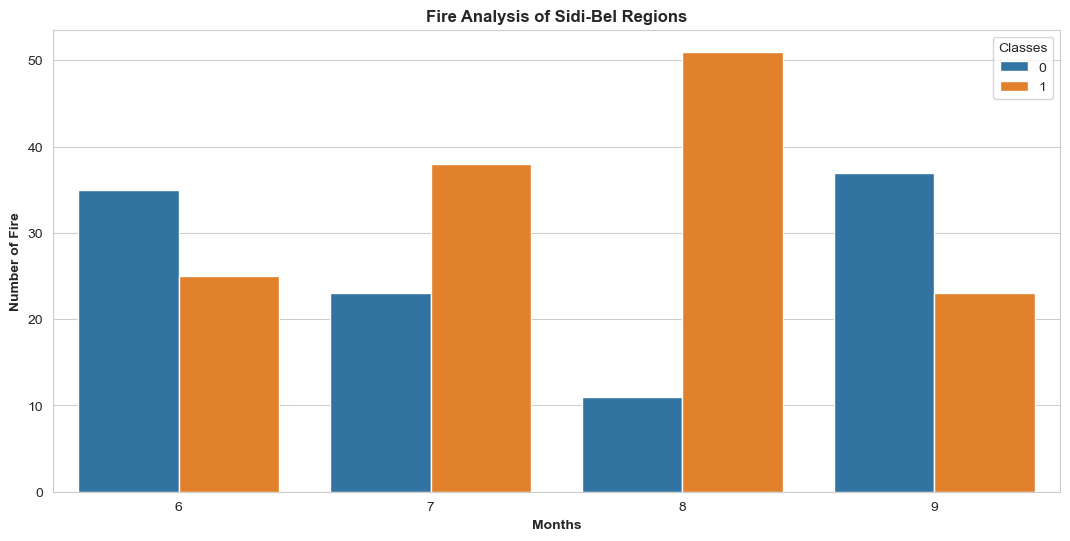

In [141]:
## Monthly fire Analysis 
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize= (13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data =df)
plt.ylabel('Number of Fire',weight='bold')
plt.xlabel('Months',weight ='bold')
plt.title('Fire Analysis of Sidi-Bel Regions',weight = 'bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

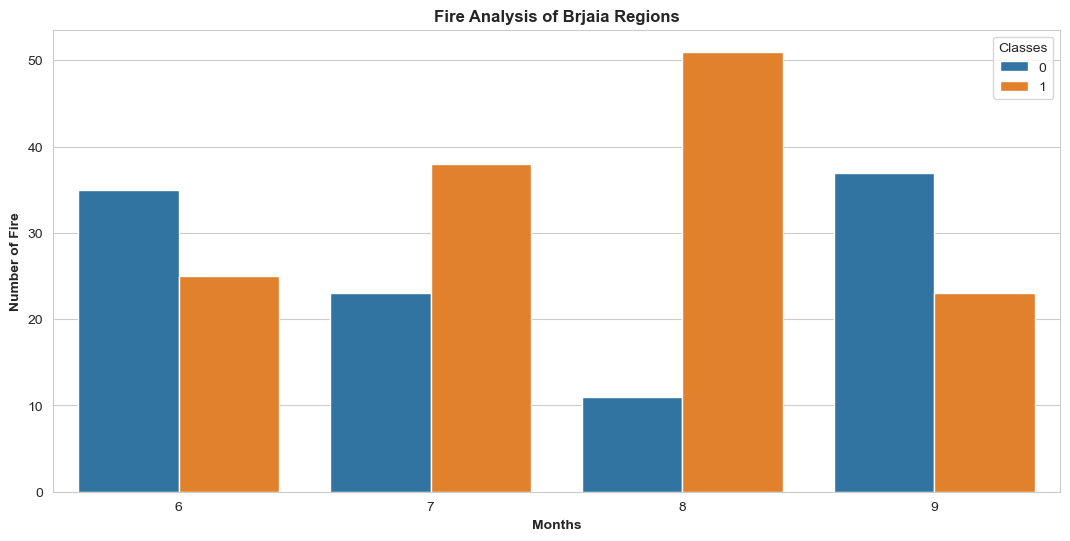

In [142]:
## Monthly fire Analysis 
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize= (13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data =df)
plt.ylabel('Number of Fire',weight='bold')
plt.xlabel('Months',weight ='bold')
plt.title('Fire Analysis of Brjaia Regions',weight = 'bold')

it observed that August  and september had the most number of forest fires for
both regions and for the above plot of months , we can understand few things.

Most of the fires happened in August and very high fires happened in only 3 months -june, july and August.

Less fires was on september.

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int32  
 14  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(7)
memory usage: 27.7 KB


## Applying ML

In [144]:
df.drop(columns=['day','month','year'],inplace = True)

In [145]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [146]:
## split data 
x = df.drop(['FWI'],axis = 1)
y = df['FWI']


In [147]:
df.shape


(243, 12)

In [148]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [151]:
print(x_train.shape)
print(x_test.shape)

(194, 11)
(49, 11)


In [152]:
print(y_train.shape)
print(y_test.shape)

(194,)
(49,)


<Axes: >

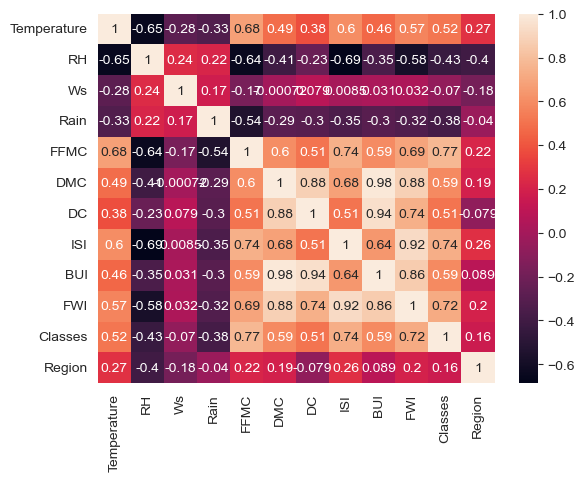

In [153]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

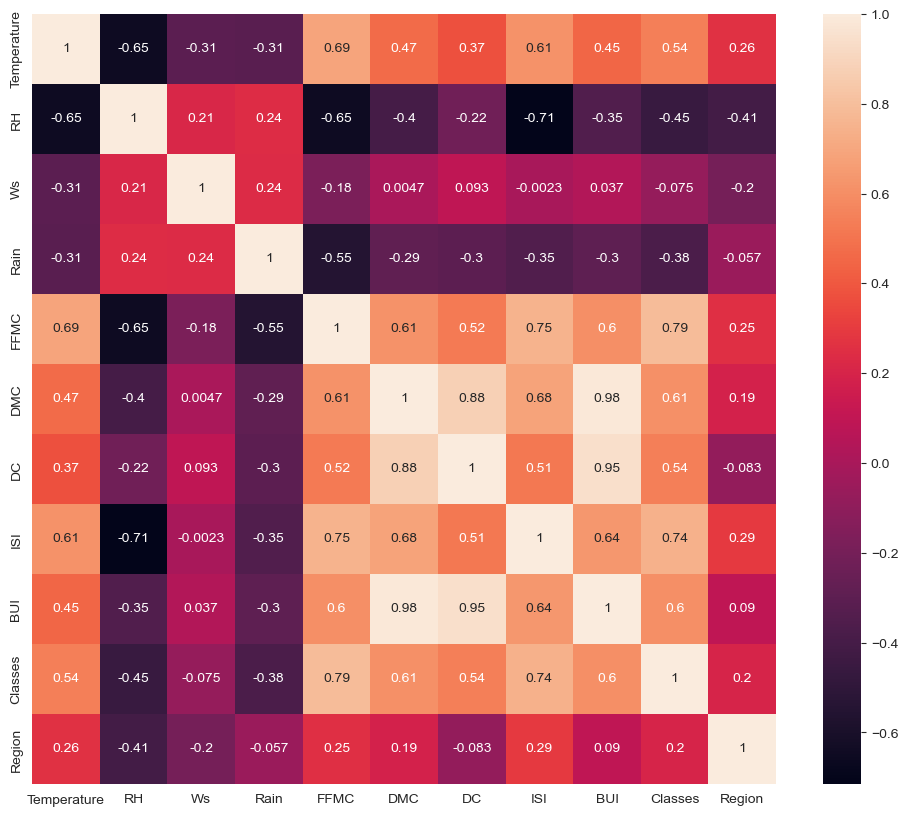

In [122]:
## Check for multicollineority 
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr,annot=True)

In [154]:
x_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

### Future Selection

In [155]:
def correlation(df,threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            
        

In [156]:
## threshold-Domain expertise
corr_features = correlation(x_train,0.85)

In [157]:
corr_features

{'BUI', 'DC'}

In [158]:
### drop features when correlation is more than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')


### Features Scaling or Standardization

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [162]:
x_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

### Box plot ot understand Effect of Standard Scaler

Text(0.5, 1.0, 'x_train After Scaling')

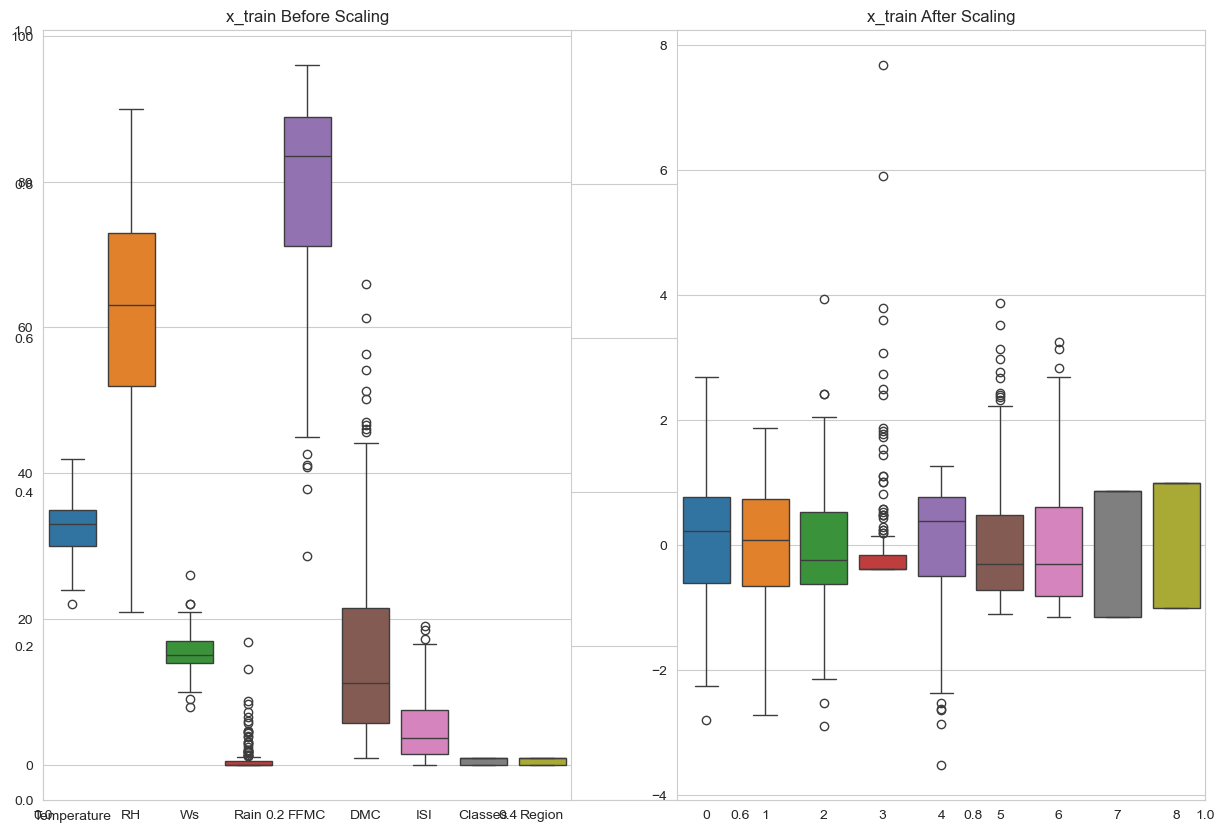

In [165]:
plt.subplots(figsize = (15,10))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('x_train After Scaling')

## Linear Regression Model

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [172]:
print(lr.coef_)
print(lr.intercept_)

[-0.02653611 -0.1808412  -0.01415259 -0.0330928  -0.82478219  3.80917655
  4.89287492  0.39085739 -0.4004259 ]
7.420103092783505


In [176]:
y_pred = lr.predict(x_test_scaled)
y_pred

array([ 8.22519075e+00,  7.79202229e+00, -2.78790834e-01,  4.35255873e+00,
        6.66767055e+00,  1.40854770e+00,  1.99494070e+00,  7.80961600e+00,
        1.73112949e+00,  3.30891017e+00,  3.45283141e-01,  9.71807910e+00,
        9.35128249e+00,  1.70641667e+01,  1.85271023e+01,  1.24547438e+00,
        1.91190325e+00,  1.15292017e-02,  7.19193092e+00,  3.07552423e+00,
        1.43106426e+00,  2.28565630e-01,  6.60694070e+00,  3.12916618e-01,
        2.11965139e+01,  5.13996171e+00,  5.92667011e+00,  9.81755385e+00,
       -2.52764587e-02,  9.81141259e+00,  6.59659846e+00, -4.24797540e-01,
        1.03857529e+01,  1.45659625e+01,  1.48302531e+00,  4.32843721e-01,
        2.01268203e+00,  6.07941922e+00, -4.77057528e-01, -4.29405448e-01,
        6.69939047e+00,  1.83829007e+00,  8.62235208e+00, -2.55650163e-01,
        1.55137765e+01,  8.31680623e+00,  8.20529717e+00,  1.43655762e+00,
        1.29816715e+01])

In [177]:
mse = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mse)
print(score)

0.5049978694165665
0.9805895859259883


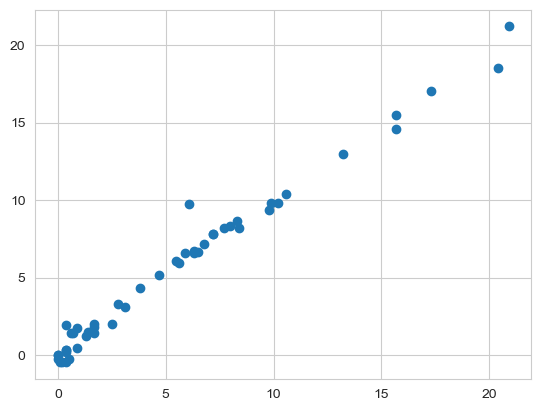

In [178]:
plt.scatter(y_test,y_pred)

## lasso Regression Model

0.5049978694165665
0.9805895859259883


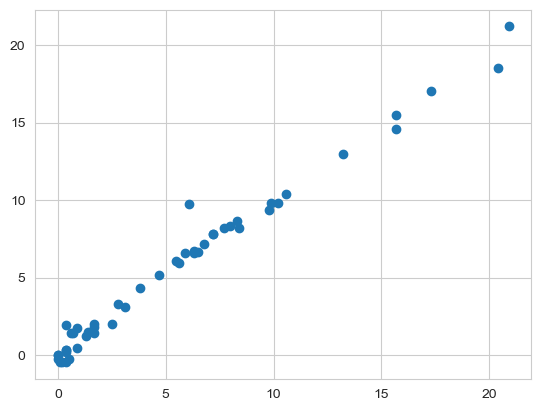

In [180]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
mse = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mse)
print(score)
plt.scatter(y_test,y_pred)

### Ridge Regression

0.5049978694165665
0.9805895859259883


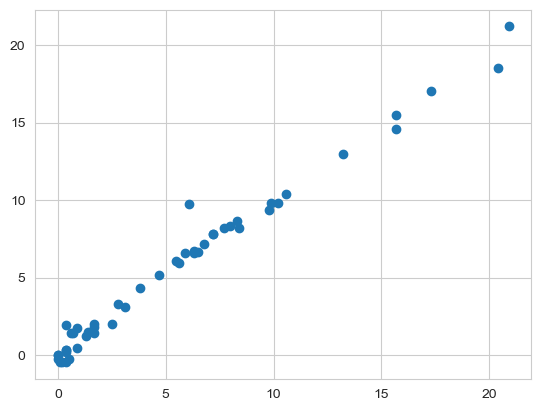

In [181]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Ridge = Ridge()
Ridge.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
mse = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mse)
print(score)
plt.scatter(y_test,y_pred)

0.6869262008277133
0.9722193780965627


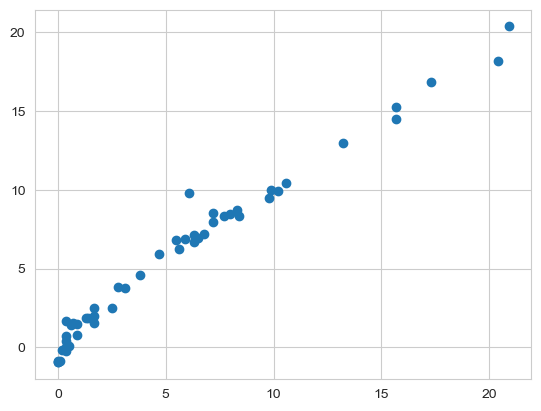

In [186]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv = 5)
ridgeCV.fit(x_train_scaled,y_train)
y_pred = ridgeCV.predict(x_test_scaled)
mse = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mse)
print(score)
plt.scatter(y_test,y_pred)

### Elasticent Regression

1.6834416340136709
0.8676961352267808


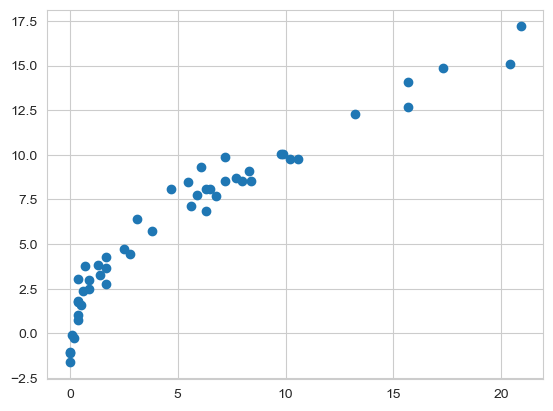

In [187]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred = elastic.predict(x_test_scaled)
mse = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mse)
print(score)
plt.scatter(y_test,y_pred)

0.5710147088777219
0.9781014571778188


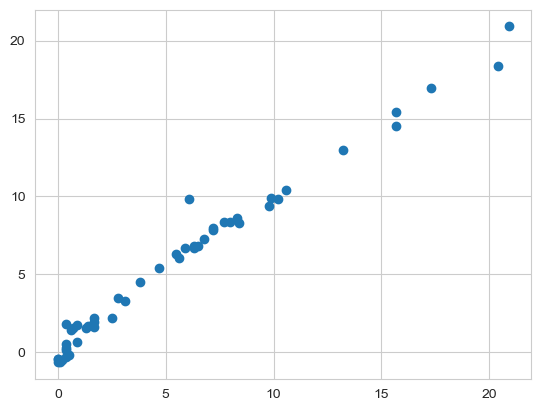

In [188]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(cv=5)
elastic.fit(x_train_scaled,y_train)
y_pred = elastic.predict(x_test_scaled)
mse = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mse)
print(score)
plt.scatter(y_test,y_pred)

### pickup Best model and convert it into pickle file , preprocessing model standardscaler

In [189]:
scaler

StandardScaler()

In [191]:
Ridge

Ridge()

In [195]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(Ridge,open('Ridge.pkl','wb'))